<a href="https://colab.research.google.com/github/nusratjannat-2001/artificial-intelligence/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [ ]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,))
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


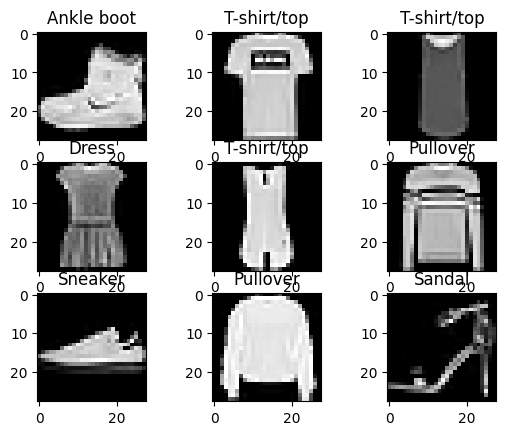

In [ ]:
# Load data
(trainX, trainY), (testX, testY) = load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {})'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some loaded image data with labels
titles = [class_names[label] for label in trainY[:9]]
display_img(trainX[:9], titles)

In [ ]:
# Turn 2D images into 3D so that trainX and TrainY will be 4D since Convolutional layer takes 4D data as input.
trainX = np.expand_dims(trainX, axis = -1)
testX = np.expand_dims(testX, axis = -1)

# Investigate updated x
print('trainX.shape: {}, testX.shape: {})'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn y into one-hot-encoding, so that we can use 10 neurons in the output layer
trainY = to_categorical(trainY, num_classes = 10)
testY = to_categorical(testY, num_classes = 10)

# Investigate updated y
print('trainY.shape: {}, testY.shape: {})'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testX.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

trainX.shape: (60000, 28, 28, 1, 1), testX.shape: (10000, 28, 28, 1, 1))
trainX.dtype: uint8, testX.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0
trainY.shape: (60000, 10, 10), testY.shape: (10000, 10, 10))
trainY.dtype: float64, testX.dtype: float64
[[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0.

In [ ]:
num_classes = 10
inputs = Input((28, 28, 1))
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax', name="OutputLayer")(x)
model = Model(inputs, outputs, name="FCNN_Classifier")
model.summary()

Model: "FCNN_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 10, 10), output.shape=(None, 10)

In [ ]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(trainX, trainY, batch_size = 32, epochs = 10)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 10), output.shape=(32, 10)

In [ ]:
model.compile(loss = 'categorical_crossentropy')
model.fit(trainX, trainY, batch_size = 32, validation_split = 0.1, epochs = 10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9122 - val_loss: 1.9025
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9165 - val_loss: 1.9191
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9208 - val_loss: 1.9086
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.9220 - val_loss: 1.9193
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9213 - val_loss: 1.9548
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9546 - val_loss: 1.9937
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0099 - val_loss: 2.0035
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.0027 - val_loss: 1.9833
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9713 - val_loss: 1.9140
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9162 - val_loss: 1.9028


In [ ]:
model.compile(loss = 'categorical_crossentropy')
model.fit(trainX, trainY, batch_size = 32, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9030
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9058
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.9056
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9118
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9437
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9261
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9165
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.9067
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9009


trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


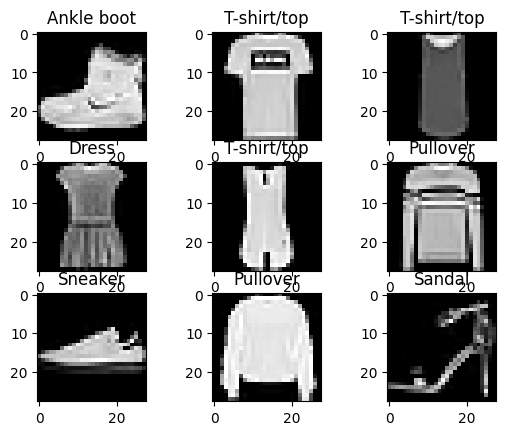

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1)
trainX.dtype: float64, testX.dtype: float64
trainX.Range: 1.0 - 0.0, testX.Range: 1.0 - 0.0
trainY.shape: (60000, 10), testY.shape: (10000, 10)
trainY.dtype: float64, testY.dtype: float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Model: "Fashion-Multi-Class-Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ InputLayer (InputLayer)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7620 - loss: 0.6571 - val_accuracy: 0.8458 - val_loss: 0.4220
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.8517 - loss: 0.4140 - val_accuracy: 0.8573 - val_loss: 0.4155
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8654 - loss: 0.3833 - val_accuracy: 0.8600 - val_loss: 0.4198
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8705 - loss: 0.3727 - val_accuracy: 0.8072 - val_loss: 0.6268
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8769 - loss: 0.3638 - val_accuracy: 0.8728 - val_loss: 0.4060
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8788 - loss: 0.3606 - val_accuracy: 0.8680 - val_loss: 0.4469
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8818 - loss: 0.3499 - val_accuracy: 0.8680 - val_loss: 0.4378
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8826 - loss: 0

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Helper function to display images
def display_img(img_set, title_set):
    n = len(title_set)
    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_set[i], cmap='gray')
        plt.title(title_set[i])
    plt.show()
    plt.close()

# Load the Fashion-MNIST dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Class labels for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some loaded image data with labels
titles = [class_names[label] for label in trainY[:9]]
display_img(trainX[:9], titles)

# Expand dimensions for CNN input (28x28 grayscale to 28x28x1)
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)

# Normalize the image data
trainX = trainX / 255.0
testX = testX / 255.0

# Investigate updated X
print('trainX.shape: {}, testX.shape: {}'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn Y into one-hot encoding correctly (num_classes=10)
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

# Investigate updated Y
print('trainY.shape: {}, testY.shape: {}'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testY.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

# Build the fully connected neural network model
inputs = Input((28, 28, 1), name='InputLayer')
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(10, activation='softmax', name='OutputLayer')(x)
model = Model(inputs, outputs, name='Fashion-Multi-Class-Classifier')
model.summary()

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainX, trainY, batch_size=32, validation_split=0.1, epochs=10)

# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

# Print original and predicted Y values
print('OriginalY   PredictedY')
print('=========   ===========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))


trainX.shape: (60000, 28, 28), trainY.shape: (60000,), testX.shape: (10000, 28, 28), testY.shape: (10000,)
trainX.dtype: uint8, trainY.dtype: uint8, testX.dtype: uint8, testY.dtype: uint8
trainX.Range: 255 - 0, testX.Range: 255 - 0


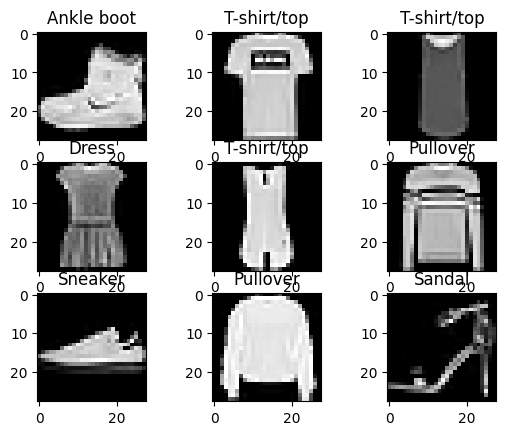

trainX.shape: (60000, 28, 28, 1), testX.shape: (10000, 28, 28, 1)
trainX.dtype: float64, testX.dtype: float64
trainX.Range: 1.0 - 0.0, testX.Range: 1.0 - 0.0
trainY.shape: (60000, 10), testY.shape: (10000, 10)
trainY.dtype: float64, testY.dtype: float64
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Model: "CNN_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │       1,003,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,096,202 (4.18 MB)

 Trainable params: 1,096,202 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 613s 363ms/step - accuracy: 0.8239 - loss: 0.5065 - val_accuracy: 0.9055 - val_loss: 0.2642
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 613s 363ms/step - accuracy: 0.9186 - loss: 0.2302 - val_accuracy: 0.9157 - val_loss: 0.2485
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 624s 365ms/step - accuracy: 0.9388 - loss: 0.1763 - val_accuracy: 0.9182 - val_loss: 0.2300
Epoch 4/10
1339/1688 ━━━━━━━━━━━━━━━━━━━━ 2:03 353ms/step - accuracy: 0.9520 - loss: 0.1407

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Conv2D
from tensorflow.keras.models import Model

# Helper function to display images
def display_img(img_set, title_set):
    n = len(title_set)
    for i in range(n):
        plt.subplot(3, 3, i + 1)
        plt.imshow(img_set[i], cmap='gray')
        plt.title(title_set[i])
    plt.show()
    plt.close()

# Load the Fashion-MNIST dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Investigate loaded data
print('trainX.shape: {}, trainY.shape: {}, testX.shape: {}, testY.shape: {}'.format(trainX.shape, trainY.shape, testX.shape, testY.shape))
print('trainX.dtype: {}, trainY.dtype: {}, testX.dtype: {}, testY.dtype: {}'.format(trainX.dtype, trainY.dtype, testX.dtype, testY.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Class labels for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display some loaded image data with labels
titles = [class_names[label] for label in trainY[:9]]
display_img(trainX[:9], titles)

# Expand dimensions for CNN input (28x28 grayscale to 28x28x1)
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)

# Normalize the image data
trainX = trainX / 255.0
testX = testX / 255.0

# Investigate updated X
print('trainX.shape: {}, testX.shape: {}'.format(trainX.shape, testX.shape))
print('trainX.dtype: {}, testX.dtype: {}'.format(trainX.dtype, testX.dtype))
print('trainX.Range: {} - {}, testX.Range: {} - {}'.format(trainX.max(), trainX.min(), testX.max(), testX.min()))

# Turn Y into one-hot encoding correctly (num_classes=10)
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

# Investigate updated Y
print('trainY.shape: {}, testY.shape: {}'.format(trainY.shape, testY.shape))
print('trainY.dtype: {}, testY.dtype: {}'.format(trainY.dtype, testY.dtype))
print(trainY[:5])

# Build the convolutional neural network model
num_classes = 10

inputs = Input((28, 28, 1))
x = Conv2D(32, kernel_size=(3, 3), padding = 'same', activation='relu')(inputs)  # 32 filters
x = Conv2D(64, kernel_size=(3, 3), padding = 'same', activation='relu')(x)  # 64 filters
x = Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu')(x)  # 128 filters
x = Flatten()(x)

outputs = Dense(num_classes, activation='softmax', name="OutputLayer")(x)
model = Model(inputs, outputs, name="CNN_Classifier")
model.summary()


# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainX, trainY, batch_size=32, validation_split=0.1, epochs=10)

# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

# Print original and predicted Y values
print('OriginalY   PredictedY')
print('=========   ===========')
for i in range(10):
    print(np.argmax(testY[i]), '\t\t', np.argmax(predictY[i]))